# Praktikum : Classification - MNIST

**Docker:**
- Laden Sie das Jupyter Notebook von Moodle in einen ML1-Praktikums-Ordner in Ihrem User-Ordner. 
- Geben Sie im Terminal ein: "docker_start_ml1_gpu". Dadurch wird ein Skript aufgerufen, das einen Docker-Container für Sie baut. Das Terminal bleibt offen, wechselt nun allerdings in einen Terminal des Docker-Containers.
- Öffnen Sie den angegebenen localhost:8888-Link mit Token im Browser. Ein Jupyter Notebook sollte sich öffnen. Unter dem Ordner "host" finden Sie Ihr Homedirectory und auch das Jupyter-Notebook für das Praktikum. 
- Zum Ende des Praktikums speichern Sie Ihre Fortschritte, und beenden dann den Docker Container mit der Eingabe von "exit" im Terminal. 


Wir haben in der Vorlesung das MNIST Dataset besprochen: Der ursprüngliche Datensatz besteht aus 70.000 28x28 Schwarzweiß-Bildern der handgeschriebenen Ziffern 0,1,2, ... 9, sowie der zugehörigen Klassifizierung der Bilder. 

Ziel: Wir wollen mit Hilfe dieser Daten Modelle trainieren, die handgeschriebene Ziffern von 0 bis 9 automatisch erkennen. 


Führen Sie den folgenden Code aus, um die Daten zu laden:


In [2]:
#Import der notwendigen Dependencies
import os
#zum Entpacken von Dateien:
import tarfile
#zum Herunterladen von Dateien:
import urllib.request
#zum Bearbeiten von "DataFrames"
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

MNIST_PATH = os.path.join("datasets", "MNIST")

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, data_home=MNIST_PATH)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original', data_home=MNIST_PATH)
x = mnist["data"]
y = mnist["target"]

Teilen Sie (data, target) in Training Set (X_train, y_train) und Test Set (X_test, y_test) mit stratified splitting bezüglich dem target.

In [3]:
from sklearn.model_selection import train_test_split

# Stratified Split der Daten
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# Verifizierung der Verteilung
print("Verteilung im Trainingsset:", np.bincount(y_train))
print("Verteilung im Testset:", np.bincount(y_test))


Verteilung im Trainingsset: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
Verteilung im Testset: [1381 1575 1398 1428 1365 1263 1375 1459 1365 1391]


X_train ist ein numpy ndarray der shape (56000, 784). 
Wir wählen eine beliebige Instance aus den Trainingsdaten, reshapen Sie sie als 28x28 Matrix, und lassen Sie sich das Bild mit matplotlib's imshow ausgeben.

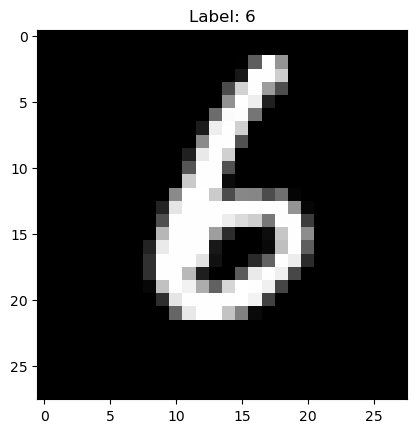

In [4]:
import matplotlib.pyplot as plt

instance_index = np.random.randint(0, x_train.shape[0])
image = x_train[instance_index].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {y_train[instance_index]}")  
plt.axis=("off")
plt.show()

### 1. Trainieren von Binary Classifiers

Wir trainieren auf MNIST zunächst einen binären Classifier. Machen Sie aus den alten Labels 0,1,2, ..., 9 neue Labels y_train_4 bzw. y_test_4, welche den Wert 1 haben für y=4 und 0 sonst.

In [5]:
y_train_4 = (y_train == 4).astype(int)
y_test_4 = (y_test == 4).astype(int)

print("Erste 10 Labels im ursprünglichen y_train:", y_train[:58])
print("Neue Labels im y_train_4:", y_train_4[:58])

print(np.bincount(y_train_4))
print(np.bincount(y_test_4))

Erste 10 Labels im ursprünglichen y_train: [0 7 0 9 1 2 1 0 2 7 2 5 7 8 6 5 0 7 2 6 7 2 7 6 7 7 1 9 7 7 6 5 3 3 1 0 9
 6 5 6 8 8 9 1 0 5 7 7 9 0 1 3 1 7 7 4 5 1]
Neue Labels im y_train_4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[50541  5459]
[12635  1365]


Trainieren Sie auf MNIST mit den neuen Labels ein Logistic Regression Modell log_reg, das bestimmt, ob eine handgeschriebene Zahl eine vier ist. Falls die Optimierung nicht konvergiert, drehen Sie an einer der Hyperparameter für die Optimierung (max_iter oder solver) - lesen Sie dazu auch gerne die Scikit-Learn Dokumentation.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42)

log_reg.fit(x_train, y_train_4)

y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test_4, y_pred)

accuracy

/home/david/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.983

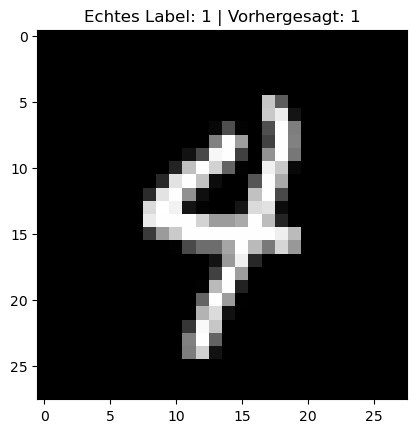

Das Modell denkt, dieses Bild ist eine '4'.


In [37]:
import matplotlib.pyplot as plt
import numpy as np
X_test = x_test
# Zufälliges Bild aus dem Testset auswählen
random_index = np.random.randint(0, X_test.shape[0])  # Zufälliger Index
image = X_test[random_index].reshape(28, 28)  # Bild in 28x28 zurückverwandeln
label = y_test_4[random_index]  # Richtiges Label (1 = "4", 0 = "nicht 4")

# Vorhersage des Modells für das Bild
predicted_label = log_reg.predict([X_test[random_index]])[0]  # Modellvorhersage (1 oder 0)

# Bild anzeigen
plt.imshow(image, cmap="gray")
plt.title(f"Echtes Label: {label} | Vorhergesagt: {predicted_label}")
#plt.axis("off")  # Korrektur: "off" ohne Klammern
plt.show()

# Ausgabe für bessere Übersicht
if predicted_label == 1:
    print("Das Modell denkt, dieses Bild ist eine '4'.")
else:
    print("Das Modell denkt, dieses Bild ist keine '4'.")


Als nächstes testieren wir für den obigen ML Task eine Support Vector Machine. Das training der SVM mit allen Daten würde allerdings länger dauern als die obigen Modelle. Dies liegt daran, dass die Dauer zum trainieren von SVMs auch linear von der Anzahl von Instances abhängt!

Scikit Learn's LinearSVC (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) ist schneller als SVC mit der Option kernel = 'linear' (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Allerdings kann man damit keine soft classification durchführen. (Normalerweise liefert der normale SVM Algorithmus auch harte Labels und keine Wahrscheinlichkeiten. Nur durch Platt Scaling kann man sie nachträglich in Wahrscheinlichkeitsvektoren umwandeln).

Wir brauchen hier jedoch für spätere Auswertungen Wahrscheinlichkeiten, daher verwenden Sie SVC mit kernel = 'linear'.

Daher trainieren wir hier nur auf den ersten 10.000 trainings-Daten. Legen Sie einen auf die ersten 10.000 instances reduzierten Datensatz X_train_small an und die entsprechenden Labels y_train_4_small.

Trainieren Sie nun auf diesen Daten für den obigen ML Task eine Linear Support Vector Machine svm_clf mit C =0.5. Verwenden Sie die Option probability=True, um Platt Scaling und den Output von Wahrscheinlichkeiten zu ermöglichen. 

Speichern Sie den SVM Classifier mit joblib.dump() unter dem Pfad MNIST_PATH  als 'SVM_Classifier_MNIST.sav'. (https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html). Wenn Sie das Praktikum später nochmal durchmachen, sparen Sie sich so das erneute trainieren. 
In der Praxis würden Sie jedes trainierte Modell nach dem Training abspeichern, und den Code zum Trainieren des Modells auskommentieren, damit Sie die Rechenleistung/-zeit nur ein einziges Mal aufbringen müssen. Zum Verwenden des Modells können Sie das Modell später einfach mit svm_clf = joblib.load(Pfad-des-Modells) wieder laden. (https://joblib.readthedocs.io/en/latest/generated/joblib.load.html#joblib.load)

In [39]:
#Daten vorbereiten
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

#SVM-Modell erstellen

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

svm_clf = SVC(kernel="linear", C=0.5, probability=True, random_state=42)

svm_clf.fit(x_train_small, y_train_small)

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test_4, y_pred)

# Modellpfad definieren
model_path = f"{MNIST_PATH}/SVM_Classifier_MNIST.sav"

# Modell speichern
joblib.dump(svm_clf, model_path)
print(f"Modell wurde gespeichert unter: {model_path}")


Modell wurde gespeichert unter: datasets/MNIST/SVM_Classifier_MNIST.sav


Was würde bei SVM für den Fall C=float("inf") passieren? 

#TODO: hard SVM classification

Nun wollen wir mit etlichen statistischen Methoden die zwei angelegten Modelle log_reg, svm_clf miteinander vergleichen: 
- Schauen Sie sich die Confusion Matrix für beide Modelle an mit confusion_matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) die Confustion Matrix ausgeben. 
- Berechnen Sie Accuracy, Precision, Recall and F1-Score der Modelle mit `precision_score, recall_score, f1_score` aus `sklearn.metrics`. Was bedeuten Precision, Recall und F1-Score? 
  #TODO: Precision = True Positives/(True Positives + False Positives)
i.e. if the model gives a positive prediction (i.e. h(x)=1), how likely is the prediction correct?

Recall = True Positives/(True Positives + False Positives)

i.e. if you have a positive instance, how likely will the model get it right, i.e. predict it to be positive?

Recall nennt man auch Sensitivity. 
  


In [7]:
# Confusion Matrix





In [8]:
# Accuracy, Precision, Recall, F1-Score

        

Warum nimmt man beim F1-Score den harmonic mean und nicht einfach den Mittelwert von Precision und Recall? Was ist der Vorteil?

#TODO: Siehe Vorlesung; F1-Score bestraft Fälle stärker, in denen entweder Recall oder Precision sehr klein sind.

##### Precision-Recall-Curve

Wir wollen nun die Precision_Recall-Curve für die Testdaten zeichnen. 

Erinnerung: Für ein Modell (mit fixem Threshold für die Wahrscheinlichkeit, zum Beispiel 50%, ab dem man eine Instance als positiv klassifiziert), gibt es einen Wert für Precision, und einen Wert für Recall. 

Lässt man allerdings den Threshold variieren (zum Beispiel weil man lieber auf Nummer sicher gehen will bei einer positiven Klassifizierung und erst ab 80% Wahrscheinlichkeit etwas als positiv klassifizieren lässt), so ändern sich entsprechend Recall und Precision Werte. Nun kann man den Threshold kontinuierlich von 0 bis 100% variieren - das ändert nicht die Wahrscheinlichkeitsvektoren, die das Modell prognostiziert, aber die Klassen, die auf Basis dieses Wahrscheinlichkeitsvektors für jede Instance festgelegt werden. 

Plottet man nun Recall und Precision für unterschiedliche Thresholds zwischen 0 und 100%, erhält man die Precision-Recall-Curve. 

Daher braucht precision_recall_curve als Input die vorhergesagten Wahrscheinlichkeiten des positiven Labels, nicht die vorhergesagten Klassen (die ändern sich ja, wenn man den Threshold variiert)! Also legen wir uns in der nächsten Zelle zunächst ein Dictionary dict_test_predictions_proba an, das für jedes Modell die vorhergesagten Wahrscheinlichkeitsvektoren (mit .predict_proba()) für das Test Set abspeichert.


In [9]:
#Berechnen der (2-dimensionalen) Wahrscheinlichkeitsvektoren (für negative und positive Klasse)



Nun berechnen Sie für jedes Modell aus den oben ausgerechneten Wahrscheinlichkeiten die Precision-Recall-Curve, indem Sie y_test_4 vergleichen mit den Wahrscheinlichkeiten der positiven Klasse, die Sie oben berechnet haben (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). Hinweis: die Wahrscheinlichkeit der positiven Klasse (1) ist der zweite Eintrag in den Wahrscheinlichkeitsvektoren (der erste ist die Wahrscheinlichkeit der negativen Klasse 0). 

Erinnerung: precision_recall_curve gibt ein Tupel zurück, das aus einer Liste der precision-Werte, einer Liste der recall-Werte, und einer LIste der zugehörigen threshold-werte ausgibt. Mit diesen Werten kann man plotten.

Legen Sie sich zum Speichern der zu plottenden Daten für die vier Modelle ein Dictionary namens dict_precisions_recalls an, in dem Sie für jedes Modell precision, recall und threshold in einer Liste abspeichern. 

In [10]:
#Berechnen der precision_recall_curve


In [11]:
#Zeichnen der Precision-Recall Curve mit plt



Welches der Modelle denken Sie ist hier das Bessere?

#TODO: Logistic Regression; SVM wurde nicht auf allen Daten trainiert. 